In [39]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from adjustText import adjust_text

In [40]:
team_color = {'ARI':'#97233F','ATL':'#A71930','BAL':'#241773','BUF':'#00338D','CAR':'#0085CA','CHI':'#00143F',
          'CIN':'#FB4F14','CLE':'#FB4F14','DAL':'#B0B7BC','DEN':'#002244','DET':'#046EB4','GB':'#24423C',
          'HOU':'#C9243F','IND':'#003D79','JAX':'#136677','KC':'#CA2430','LAR':'#002147','LAC':'#2072BA',
          'MIA':'#0091A0','MIN':'#4F2E84','NE':'#0A2342','NO':'#A08A58','NYG':'#192E6C','NYJ':'#203731',
          'LV':'#C4C9CC','PHI':'#014A53','PIT':'#FFC20E','SEA':'#7AC142','SF':'#C9243F','TB':'#D40909',
          'TEN':'#4095D1','WAS':'#FFC20F'}

In [62]:
import_data = nfl.import_seasonal_data([2022])
seasonal_attempts = pd.DataFrame(index = import_data.index)
seasonal_attempts["Player ID"] = import_data["player_id"]
seasonal_attempts["pass_attempts"] = import_data["attempts"]

import_weekly_data = nfl.import_weekly_data([2022])             
weekly_attempts = pd.DataFrame(index = import_weekly_data.index)
weekly_attempts["Player"] = import_weekly_data["player_name"]
weekly_attempts["Player ID"] = import_weekly_data["player_id"]
weekly_attempts["Team"] = import_weekly_data["recent_team"]
weekly_attempts["Player Full Name"] = import_weekly_data["player_display_name"]
weekly_attempts = weekly_attempts.drop_duplicates(subset=['Player Full Name'])

merged_attempts = weekly_attempts.merge(seasonal_attempts, left_on='Player ID', right_on='Player ID')
merged_attempts = merged_attempts.drop(columns=["Player", "Player ID", "Player Full Name"])
merged_attempts.loc[merged_attempts["Team"] == "LA", "Team"] = "LAR"
merged_attempts = merged_attempts.groupby(["Team"]).sum()

Downcasting floats.


In [42]:
import_data = nfl.import_seasonal_data([2022])             
wr_season_data = pd.DataFrame(index = import_data.index)
wr_season_data["Player ID"] = import_data["player_id"]
wr_season_data["Receptions"] = import_data["receptions"]
wr_season_data["Targets"] = import_data["targets"]
wr_season_data["Receiving Yards"] = import_data["receiving_yards"]
wr_season_data["Receiving TDs"] = import_data["receiving_tds"]
wr_season_data["Fumbles"] = import_data["receiving_fumbles"]
wr_season_data["Fumbles Lost"] = import_data["receiving_fumbles_lost"]
wr_season_data["Air Yards"] = import_data["receiving_air_yards"]
wr_season_data["YAC"] = import_data["receiving_yards_after_catch"]
wr_season_data["Receiving 1st Downs"] = import_data["receiving_first_downs"]
wr_season_data["Receiving EPA"] = import_data["receiving_epa"]
wr_season_data["Receiving 2pt Conversions"] = import_data["receiving_2pt_conversions"]
wr_season_data["RACR"] = import_data["racr"]
wr_season_data["Target Share"] = import_data["target_share"]
wr_season_data["Air Yards Share"] = import_data["air_yards_share"]
wr_season_data["Games Played"] = import_data["games"]
wr_season_data

,Player ID,Receptions,Targets,Receiving Yards,Receiving TDs,Fumbles,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played
0,00-0019596,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,3
1,00-0023459,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,3
2,00-0026143,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,3
3,00-0026158,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,3
4,00-0026498,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,00-0038120,13,21,101.0,1,1.0,1.0,89.0,73.0,6.0,-4.806217,0,4.752950,0.410317,0.213668,3
401,00-0038124,5,7,43.0,0,0.0,0.0,50.0,38.0,1.0,-2.613997,0,0.576271,0.234286,0.216204,2
402,00-0038128,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0.000000,0.000000,0.000000,1
403,00-0038129,1,2,4.0,0,0.0,0.0,14.0,4.0,0.0,-1.091860,0,0.285714,0.060606,0.045161,1


In [43]:
import_weekly_data = nfl.import_weekly_data([2022])             
wr_data = pd.DataFrame(index = import_weekly_data.index)
wr_data["Player"] = import_weekly_data["player_name"]
wr_data["Player ID"] = import_weekly_data["player_id"]
wr_data["Team"] = import_weekly_data["recent_team"]
wr_data["Player Full Name"] = import_weekly_data["player_display_name"]
wr_data = wr_data.drop_duplicates(subset=['Player Full Name'])
wr_data.loc[wr_data["Team"] == "LA", "Team"] = "LAR"

Downcasting floats.


In [64]:
wr_merged_season_data = wr_data.merge(wr_season_data, left_on='Player ID', right_on='Player ID')
wr_merged_season_data = wr_merged_season_data.drop(columns=["Player ID"])
wr_merged_season_data = wr_merged_season_data.merge(merged_attempts, left_on='Team', right_on='Team')
wr_merged_season_data["Target Share"] = wr_merged_season_data["Targets"]/wr_merged_season_data["pass_attempts"]
wr_merged_season_data.sort_values(by=['Team'])

,Player,Team,Player Full Name,Receptions,Targets,Receiving Yards,Receiving TDs,Fumbles,Fumbles Lost,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played,pass_attempts
74,A.Baccellia,ARI,Andre Baccellia,4,6,25.0,0,0.0,0.0,55.0,9.0,2.0,0.723791,0,1.985119,0.041379,0.173867,2,145
75,E.Benjamin,ARI,Eno Benjamin,8,12,60.0,0,0.0,0.0,-21.0,78.0,1.0,-0.869664,0,13.961538,0.082759,-0.073479,3,145
64,A.Green,ARI,A.J. Green,5,13,29.0,0,0.0,0.0,115.0,9.0,2.0,-8.301144,1,0.636054,0.089655,0.435205,3,145
65,Z.Ertz,ARI,Zach Ertz,16,25,134.0,1,0.0,0.0,139.0,58.0,8.0,-0.522506,1,2.692179,0.172414,0.503095,3,145
66,S.Anderson,ARI,Stephen Anderson,1,1,2.0,0,0.0,0.0,2.0,0.0,0.0,-0.470388,0,1.000000,0.006897,0.008368,1,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,J.McKissic,WAS,J.D. McKissic,16,19,106.0,0,0.0,0.0,41.0,72.0,7.0,5.889812,1,24.365915,0.146154,0.113043,3,130
276,L.Thomas,WAS,Logan Thomas,8,14,87.0,1,0.0,0.0,151.0,31.0,4.0,-2.826106,0,1.595756,0.107692,0.445817,3,130
287,J.Dotson,WAS,Jahan Dotson,9,18,109.0,3,0.0,0.0,245.0,18.0,6.0,3.775133,1,1.463561,0.138462,0.724065,3,130
280,C.Samuel,WAS,Curtis Samuel,22,30,181.0,2,0.0,0.0,105.0,103.0,10.0,7.798072,0,7.648951,0.230769,0.289547,3,130


In [65]:
wr_data_ngs = pd.read_csv("../Resources/ngs_2022_receiving.csv")
wr_data_ngs = wr_data_ngs.loc[wr_data_ngs["week"] == 0, :]
wr_data_ngs = wr_data_ngs.sort_values(by=['team_abbr'])
wr_data_ngs = wr_data_ngs.drop_duplicates(subset=['player_display_name'])
wr_data_full = wr_data_ngs.merge(wr_merged_season_data, left_on='player_display_name', right_on='Player Full Name')
wr_data_full = wr_data_full.drop(columns = ["season", "season_type", "player_first_name", "player_last_name",
                                            "player_jersey_number", "week", "Team", "Player Full Name", "Receptions",
                                           "Targets", "Receiving Yards", "Receiving TDs"])
wr_data_full.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'avg_cushion',
       'avg_separation', 'avg_intended_air_yards',
       'percent_share_of_intended_air_yards', 'receptions', 'targets',
       'catch_percentage', 'yards', 'rec_touchdowns', 'avg_yac',
       'avg_expected_yac', 'avg_yac_above_expectation', 'player_gsis_id',
       'player_short_name', 'Player', 'Fumbles', 'Fumbles Lost', 'Air Yards',
       'YAC', 'Receiving 1st Downs', 'Receiving EPA',
       'Receiving 2pt Conversions', 'RACR', 'Target Share', 'Air Yards Share',
       'Games Played', 'pass_attempts'],
      dtype='object')

In [67]:
wr_data_full = wr_data_full.loc[wr_data_full["targets"]/wr_data_full["Games Played"] >= 5, :]
wr_data_full = wr_data_full.reset_index()
wr_data_full = wr_data_full.drop(columns = ["index"])
#wr_data_full = wr_data_full.drop(columns = ["level_0"])
wr_data_full

,player_display_name,player_position,team_abbr,avg_cushion,avg_separation,avg_intended_air_yards,percent_share_of_intended_air_yards,receptions,targets,catch_percentage,...,Air Yards,YAC,Receiving 1st Downs,Receiving EPA,Receiving 2pt Conversions,RACR,Target Share,Air Yards Share,Games Played,pass_attempts
0,Zach Ertz,TE,ARI,5.056190,3.347326,6.122000,18.634183,16,25,64.000000,...,139.0,58.0,8.0,-0.522506,1,2.692179,0.172414,0.503095,3,145
1,Greg Dortch,WR,ARI,7.324091,4.454269,4.861304,13.613120,20,23,86.956522,...,121.0,113.0,10.0,12.955886,0,5.740440,0.158621,0.435407,3,145
2,Marquise Brown,WR,ARI,7.330303,3.345151,10.249118,42.427010,24,34,70.588235,...,335.0,87.0,11.0,5.454251,0,2.149147,0.234483,1.194691,3,145
3,Kyle Pitts,TE,ATL,6.920769,1.993366,14.536111,34.082324,9,18,50.000000,...,283.0,43.0,7.0,5.240112,0,1.491574,0.227848,0.982396,3,79
4,Drake London,WR,ATL,8.315600,3.407236,10.687200,34.802657,16,25,64.000000,...,272.0,79.0,11.0,13.486826,1,2.355803,0.316456,1.065865,3,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,Robert Woods,WR,TEN,6.714000,2.459742,10.731250,25.207000,9,16,56.250000,...,173.0,40.0,6.0,-1.772181,0,2.178283,0.190476,0.870755,3,84
75,Kyle Philips,WR,TEN,7.348000,2.910280,7.053000,10.354395,7,10,70.000000,...,72.0,18.0,3.0,0.257446,0,0.880000,0.119048,0.243392,2,84
76,Jahan Dotson,WR,WAS,7.175294,3.173892,14.964444,25.827484,9,18,50.000000,...,245.0,18.0,6.0,3.775133,1,1.463561,0.138462,0.724065,3,130
77,Curtis Samuel,WR,WAS,7.111600,3.906668,3.645000,10.484984,22,30,73.333333,...,105.0,103.0,10.0,7.798072,0,7.648951,0.230769,0.289547,3,130


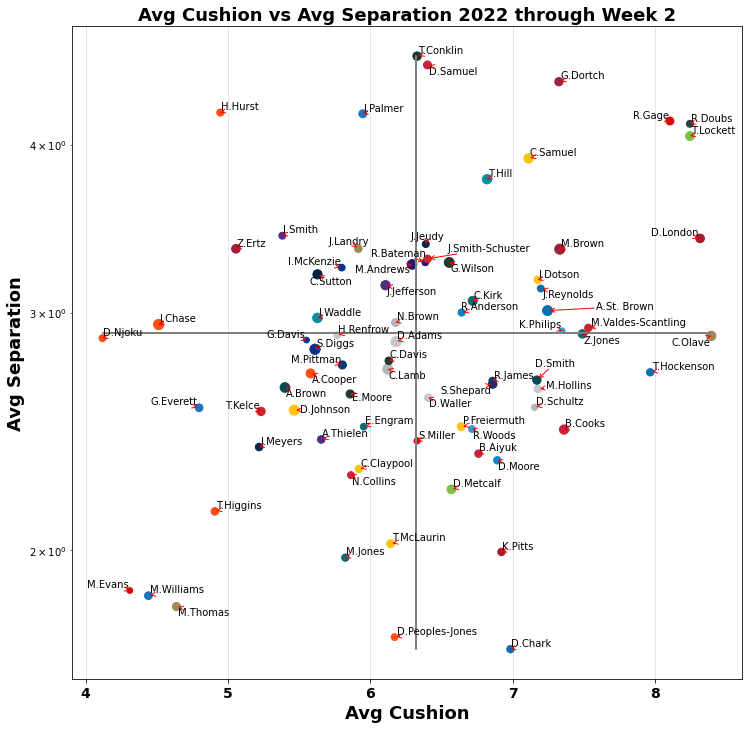

In [47]:
wr_graph = wr_data_full[["player_short_name", "avg_cushion", "avg_separation", "team_abbr", "targets"]]

x = wr_graph["avg_cushion"]
y = wr_graph["avg_separation"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Cushion', fontsize=18, fontweight = "bold")
plt.ylabel('Avg Separation', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Avg Cushion vs Avg Separation 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

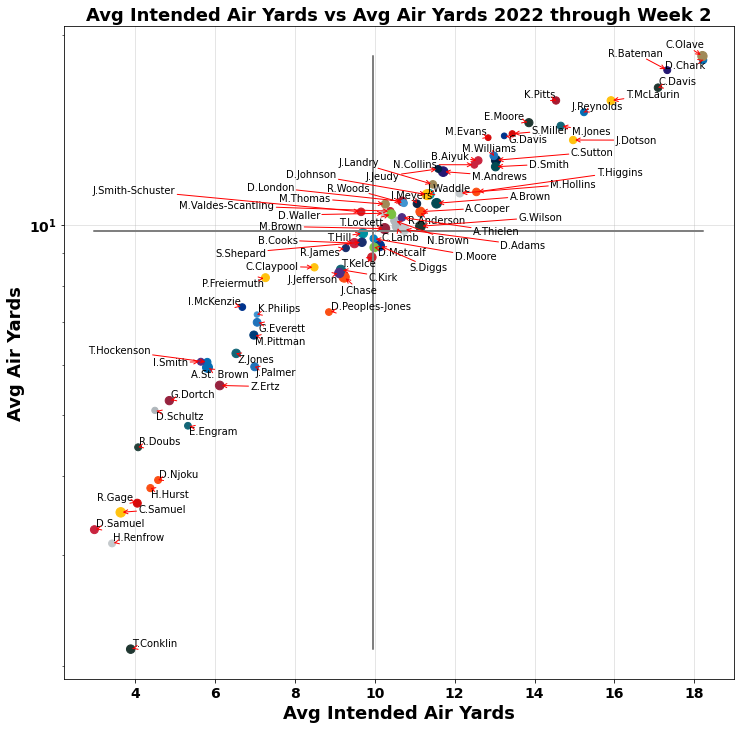

In [48]:
wr_graph = wr_data_full[["player_short_name", "avg_intended_air_yards", "Air Yards", "team_abbr", "targets"]]

x = wr_graph["avg_intended_air_yards"]
y = wr_graph["Air Yards"]/wr_graph["targets"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Avg Intended Air Yards', fontsize=18, fontweight = "bold")
plt.ylabel('Avg Air Yards', fontsize=18, fontweight = "bold")
plt.yscale('log')
plt.title('Avg Intended Air Yards vs Avg Air Yards 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

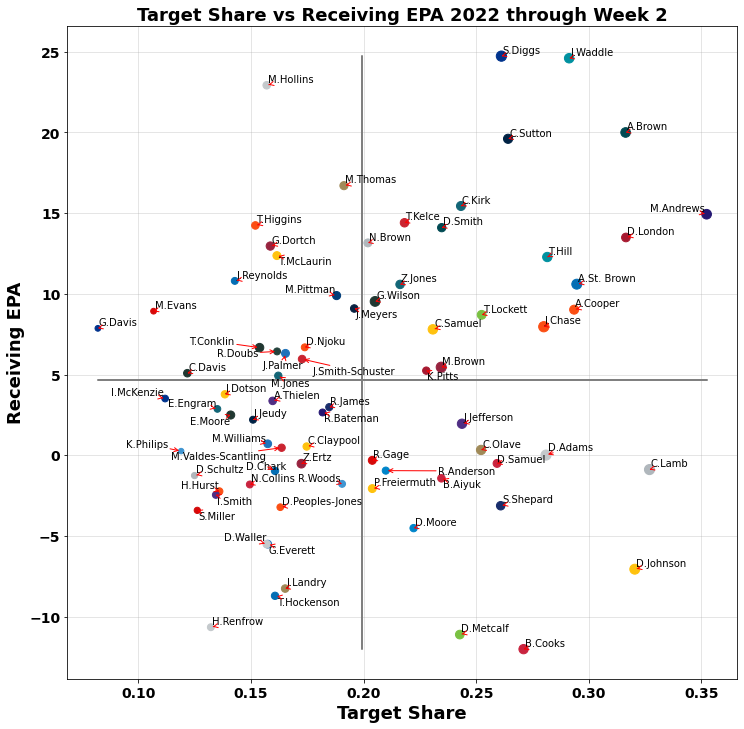

In [49]:
wr_graph = wr_data_full[["player_short_name", "Target Share", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Target Share vs Receiving EPA 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig('Images/TargetShare_vs_RecEPA', dpi=400)
plt.show()

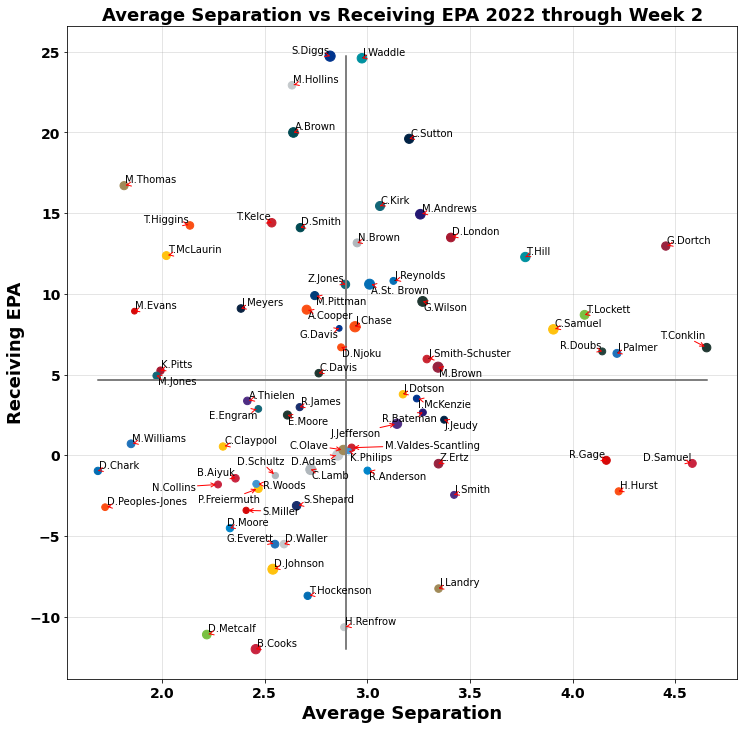

In [50]:
wr_graph = wr_data_full[["player_short_name", "avg_separation", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["avg_separation"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Average Separation', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Average Separation vs Receiving EPA 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

In [70]:
wr_data_pfr = pd.read_csv("../Resources/advstats_season_rec.csv")
wr_data_pfr = wr_data_pfr.loc[wr_data_pfr["season"] == 2022, :]
wr_data_pfr = wr_data_pfr.drop(columns=["season", "tm", "pfr_id", "age", "pos", "gs", "tgt", "rec","yds", "td",
                                        "loaded"])
wr_data_all = wr_data_full.merge(wr_data_pfr, left_on='player_display_name', right_on='player')
wr_data_all.columns

Index(['player_display_name', 'player_position', 'team_abbr', 'avg_cushion',
       'avg_separation', 'avg_intended_air_yards',
       'percent_share_of_intended_air_yards', 'receptions', 'targets',
       'catch_percentage', 'yards', 'rec_touchdowns', 'avg_yac',
       'avg_expected_yac', 'avg_yac_above_expectation', 'player_gsis_id',
       'player_short_name', 'Player', 'Fumbles', 'Fumbles Lost', 'Air Yards',
       'YAC', 'Receiving 1st Downs', 'Receiving EPA',
       'Receiving 2pt Conversions', 'RACR', 'Target Share', 'Air Yards Share',
       'Games Played', 'pass_attempts', 'player', 'g', 'x1d', 'ybc', 'ybc_r',
       'yac', 'yac_r', 'adot', 'brk_tkl', 'rec_br', 'drop', 'drop_percent',
       'int', 'rat'],
      dtype='object')

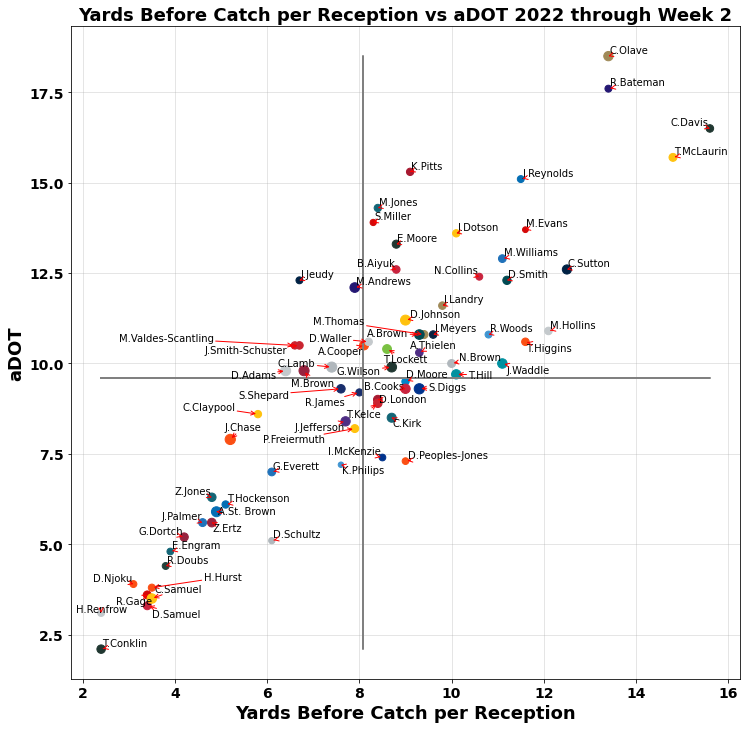

In [52]:
wr_graph = wr_data_all[["player_short_name", "ybc_r", "adot", "team_abbr", "targets"]]

x = wr_graph["ybc_r"]
y = wr_graph["adot"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Yards Before Catch per Reception', fontsize=18, fontweight = "bold")
plt.ylabel('aDOT', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Yards Before Catch per Reception vs aDOT 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

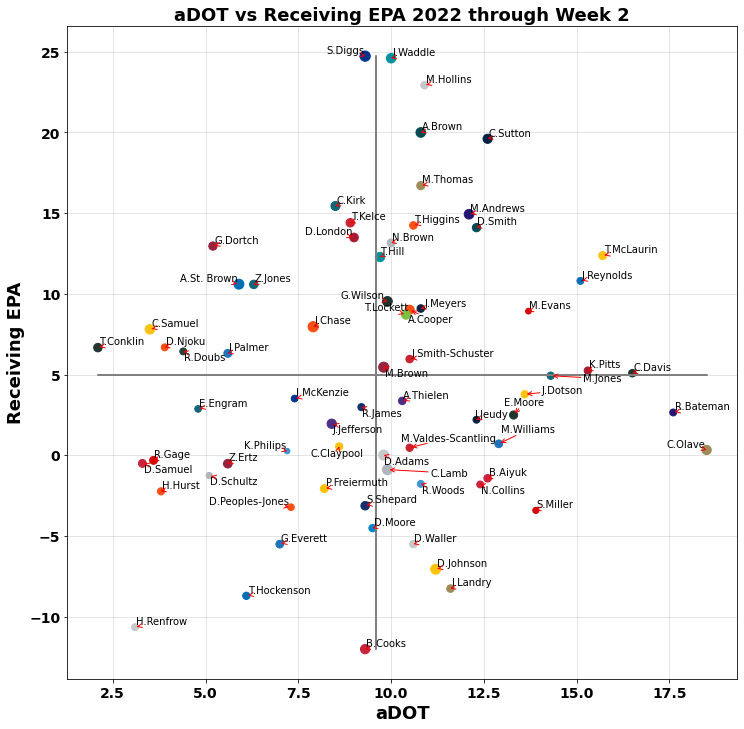

In [53]:
wr_graph = wr_data_all[["player_short_name", "adot", "Receiving EPA", "team_abbr", "targets"]]

x = wr_graph["adot"]
y = wr_graph["Receiving EPA"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('aDOT', fontsize=18, fontweight = "bold")
plt.ylabel('Receiving EPA', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('aDOT vs Receiving EPA 2022 through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig('Images/aDot_vs_RecEPA', dpi=400)
plt.show()

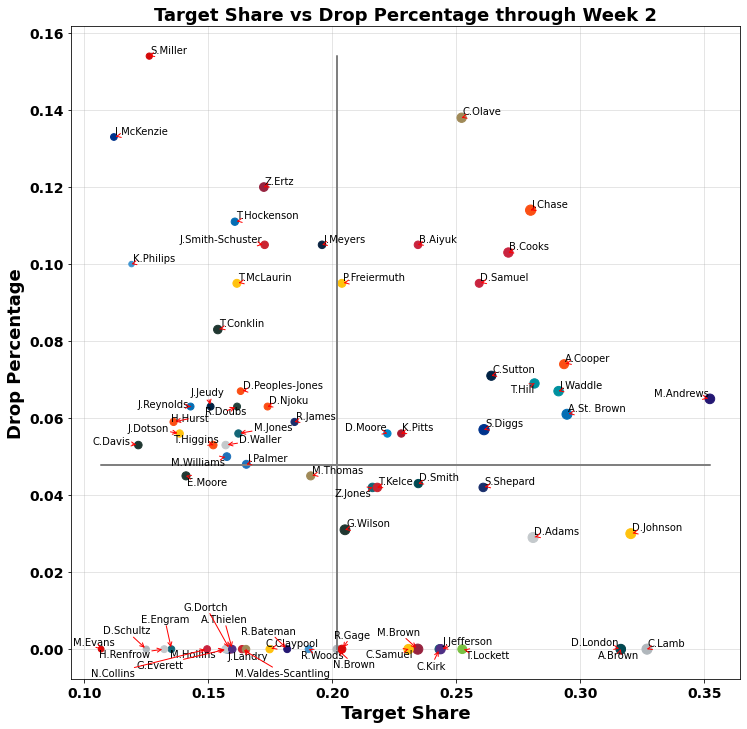

In [54]:
wr_graph = wr_data_all[["player_short_name", "Target Share", "drop_percent", "team_abbr", "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["drop_percent"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=18, fontweight = "bold")
plt.ylabel('Drop Percentage', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Target Share vs Drop Percentage through Week 2', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

#plt.savefig('Images/AvgAirYards1stDown_vs_Passing1stDown', dpi=400)
plt.show()

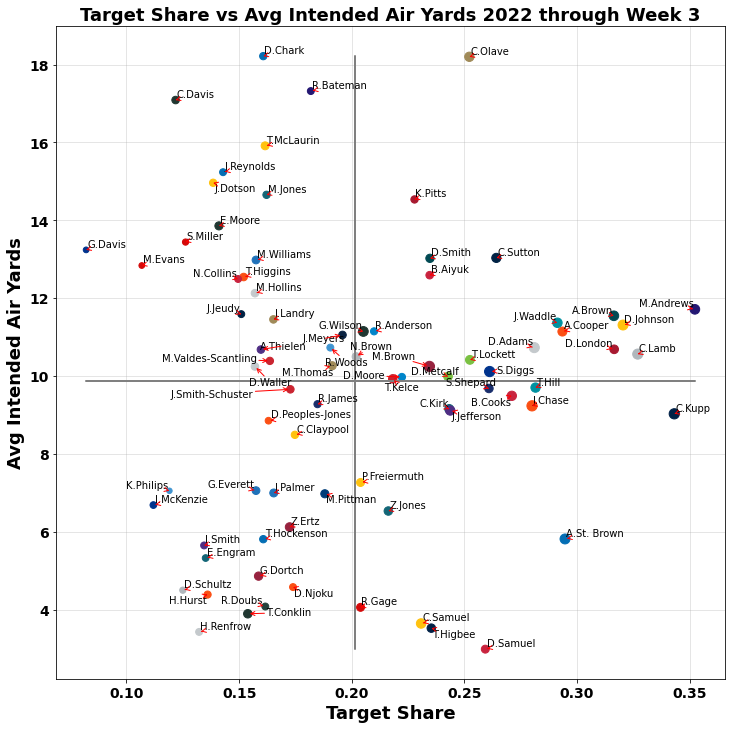

In [72]:
wr_graph = wr_data_full[["player_short_name", "Target Share", "avg_intended_air_yards", "team_abbr", "targets"]]

x = wr_graph["Target Share"]
y = wr_graph["avg_intended_air_yards"]
color = []
x_mean = [np.mean(x)]*len(x)
y_mean = [np.mean(y)]*len(y)

for team in wr_graph["team_abbr"]:
    color.append(team_color[team])

size = wr_graph["targets"].to_numpy()
s = [s*3 for s in size]

#Create a figure with size 12x12
fig, ax = plt.subplots(figsize=(12,12))

#Make a scatter plot with success rate data
plt.scatter(x, y, c = color, s = s)

mean_line = ax.plot(x_mean,y, c = 'grey')
mean_line = ax.plot(x,y_mean, c = 'grey')
    
#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)

#Adding labels and text
plt.xlabel('Target Share', fontsize=18, fontweight = "bold")
plt.ylabel('Avg Intended Air Yards', fontsize=18, fontweight = "bold")
#plt.yscale('log')
plt.title('Target Share vs Avg Intended Air Yards 2022 through Week 3', fontsize=18, fontweight = "bold")
plt.xticks(fontsize=14, fontweight = "bold")
plt.yticks(fontsize=14, fontweight = "bold")

#Add player names to points
texts = [plt.text(x[i], y[i], txt, ha='center', va='center') for i, txt in enumerate(wr_graph["player_short_name"])]    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='red'))

plt.savefig('Images/AvgAirYards_vs_TargetShare', dpi=400)
plt.show()